# Import the necessary libraries.

In [101]:
#Import all necessary modules
import pandas as pd  ###Software library written for the Python programming language for data manipulation and analysis.
import numpy as np ### fundamental package for scientific computing with Python
import os ### using operating system dependent functionality
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score,roc_curve
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split

# Load the dataset and check the first 10 rows of the dataset.

In [2]:
os.chdir("D:/Academic Operations/DSBA - Python/Online/Predictive Modelling/LDA/Practice Exercise")
os.getcwd()

'D:\\Academic Operations\\DSBA - Python\\Online\\Predictive Modelling\\LDA\\Practice Exercise'

In [3]:
df = pd.read_csv('CreditBank.csv')
df.head(10)

,Cust_ID,Target,Age,Gender,Balance,Occupation,No_OF_CR_TXNS,SCR,Holding_Period
0,C1,0,30,M,160378.60,SAL,2,826,9
1,C10,1,41,M,84370.59,SELF-EMP,14,843,9
2,C100,0,49,F,60849.26,PROF,49,328,26
3,C1000,0,49,M,10558.81,SAL,23,619,19
4,C10000,0,43,M,97100.48,SENP,3,397,8
5,C10001,0,30,M,160378.60,SAL,2,781,11
6,C10002,0,43,M,26275.55,PROF,23,354,12
7,C10003,0,53,M,33616.47,SAL,45,239,5
8,C10004,0,45,M,1881.37,PROF,3,339,13
9,C10005,0,37,M,3274.37,PROF,33,535,9


# Drop the column which is not useful to us in the Linear Discriminant Analysis algorithm.

In [4]:
data_df = df.drop('Cust_ID',axis=1)

In [5]:
data_df.head()

,Target,Age,Gender,Balance,Occupation,No_OF_CR_TXNS,SCR,Holding_Period
0,0,30,M,160378.60,SAL,2,826,9
1,1,41,M,84370.59,SELF-EMP,14,843,9
2,0,49,F,60849.26,PROF,49,328,26
3,0,49,M,10558.81,SAL,23,619,19
4,0,43,M,97100.48,SENP,3,397,8


# Check the basic measures of Descriptive Statistics of the dataframe.

In [6]:
data_df.describe(include='all')

,Target,Age,Gender,Balance,Occupation,No_OF_CR_TXNS,SCR,Holding_Period
count,20000.000000,20000.000000,20000,2.000000e+04,20000,20000.000000,20000.000000,20000.000000
unique,NaN,NaN,3,NaN,4,NaN,NaN,NaN
top,NaN,NaN,M,NaN,SAL,NaN,NaN,NaN
freq,NaN,NaN,14279,NaN,5839,NaN,NaN,NaN
mean,0.086650,38.396200,NaN,1.461813e+05,NaN,16.653050,557.136050,15.344100
std,0.281329,9.600179,NaN,1.698125e+05,NaN,12.977704,260.521453,8.952128
min,0.000000,21.000000,NaN,0.000000e+00,NaN,0.000000,100.000000,1.000000
25%,0.000000,30.000000,NaN,2.373692e+04,NaN,7.000000,333.000000,8.000000
50%,0.000000,38.000000,NaN,7.975574e+04,NaN,13.000000,560.000000,16.000000
75%,0.000000,47.000000,NaN,2.173106e+05,NaN,22.000000,784.000000,23.000000


# Check the information about the various data types of the variables in the data frame. Also check for missing values.

In [7]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 8 columns):
Target            20000 non-null int64
Age               20000 non-null int64
Gender            20000 non-null object
Balance           20000 non-null float64
Occupation        20000 non-null object
No_OF_CR_TXNS     20000 non-null int64
SCR               20000 non-null int64
Holding_Period    20000 non-null int64
dtypes: float64(1), int64(5), object(2)
memory usage: 1.2+ MB


In [35]:
data_df.isnull().sum()

Target                 0
Age                    0
Balance                0
No_OF_CR_TXNS          0
SCR                    0
Holding_Period         0
Gender_M               0
Gender_O               0
Occupation_SAL         0
Occupation_SELF-EMP    0
Occupation_SENP        0
dtype: int64

We see that there are no missing values as confirmed by the above snippet.

# Convert the values into the dummy variables. 

In [8]:
data_df = pd.get_dummies(data_df,drop_first=True)
data_df.head()

,Target,Age,Balance,No_OF_CR_TXNS,SCR,Holding_Period,Gender_M,Gender_O,Occupation_SAL,Occupation_SELF-EMP,Occupation_SENP
0,0,30,160378.60,2,826,9,1,0,1,0,0
1,1,41,84370.59,14,843,9,1,0,0,1,0
2,0,49,60849.26,49,328,26,0,0,0,0,0
3,0,49,10558.81,23,619,19,1,0,1,0,0
4,0,43,97100.48,3,397,8,1,0,0,0,1


# Plot the correlation heatmap of the predictor variables.

In [9]:
data_df.iloc[:,1:11].corr()

,Age,Balance,No_OF_CR_TXNS,SCR,Holding_Period,Gender_M,Gender_O,Occupation_SAL,Occupation_SELF-EMP,Occupation_SENP
Age,1.000000,-0.146920,0.058350,-0.005501,-0.011765,0.082920,0.014294,0.054031,-0.018301,-0.059572
Balance,-0.146920,1.000000,-0.135032,-0.015087,0.022917,-0.179496,-0.022501,-0.084633,-0.047212,0.124165
No_OF_CR_TXNS,0.058350,-0.135032,1.000000,0.003036,-0.026593,0.216527,0.069619,0.230691,0.010132,-0.239398
SCR,-0.005501,-0.015087,0.003036,1.000000,-0.030739,-0.000934,0.000774,-0.014518,0.014688,0.005216
Holding_Period,-0.011765,0.022917,-0.026593,-0.030739,1.000000,-0.026714,-0.001329,0.002393,-0.017739,0.016538
Gender_M,0.082920,-0.179496,0.216527,-0.000934,-0.026714,1.000000,-0.157168,0.224427,0.016810,-0.234147
Gender_O,0.014294,-0.022501,0.069619,0.000774,-0.001329,-0.157168,1.000000,0.034360,-0.001339,-0.059981
Occupation_SAL,0.054031,-0.084633,0.230691,-0.014518,0.002393,0.224427,0.034360,1.000000,-0.288856,-0.387152
Occupation_SELF-EMP,-0.018301,-0.047212,0.010132,0.014688,-0.017739,0.016810,-0.001339,-0.288856,1.000000,-0.271218
Occupation_SENP,-0.059572,0.124165,-0.239398,0.005216,0.016538,-0.234147,-0.059981,-0.387152,-0.271218,1.000000


It is difficult to understand the extent of correlation by painstakingly looking at the numbers of the above matrix. So, let us plot a correlation heatmap.

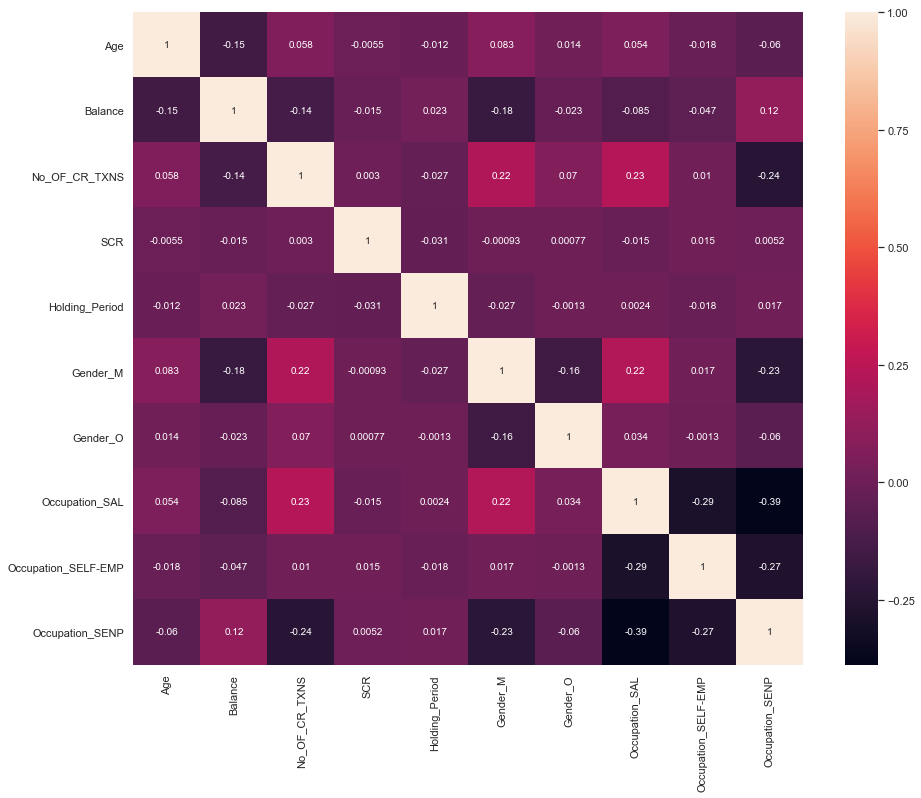

In [33]:
plt.figure(figsize =(15,12))
fig = sns.heatmap(data_df.iloc[:,1:11].corr(),annot=True,cbar=True)
plt.show()

###### Note: If the plot of the heatmap has the two extreme truncated please do run the following code snippet to downagrade the library 'matplotlib' and then try to plot the heatmap once more. You may have to restart Jupyter Notebook to make sure that these changes take place.

###### '!pip install --upgrade matplotlib==3.0.3 --user' - run this line in a cell of the Jupyter Notebook.

# Plot graphs based on bivariate analysis.

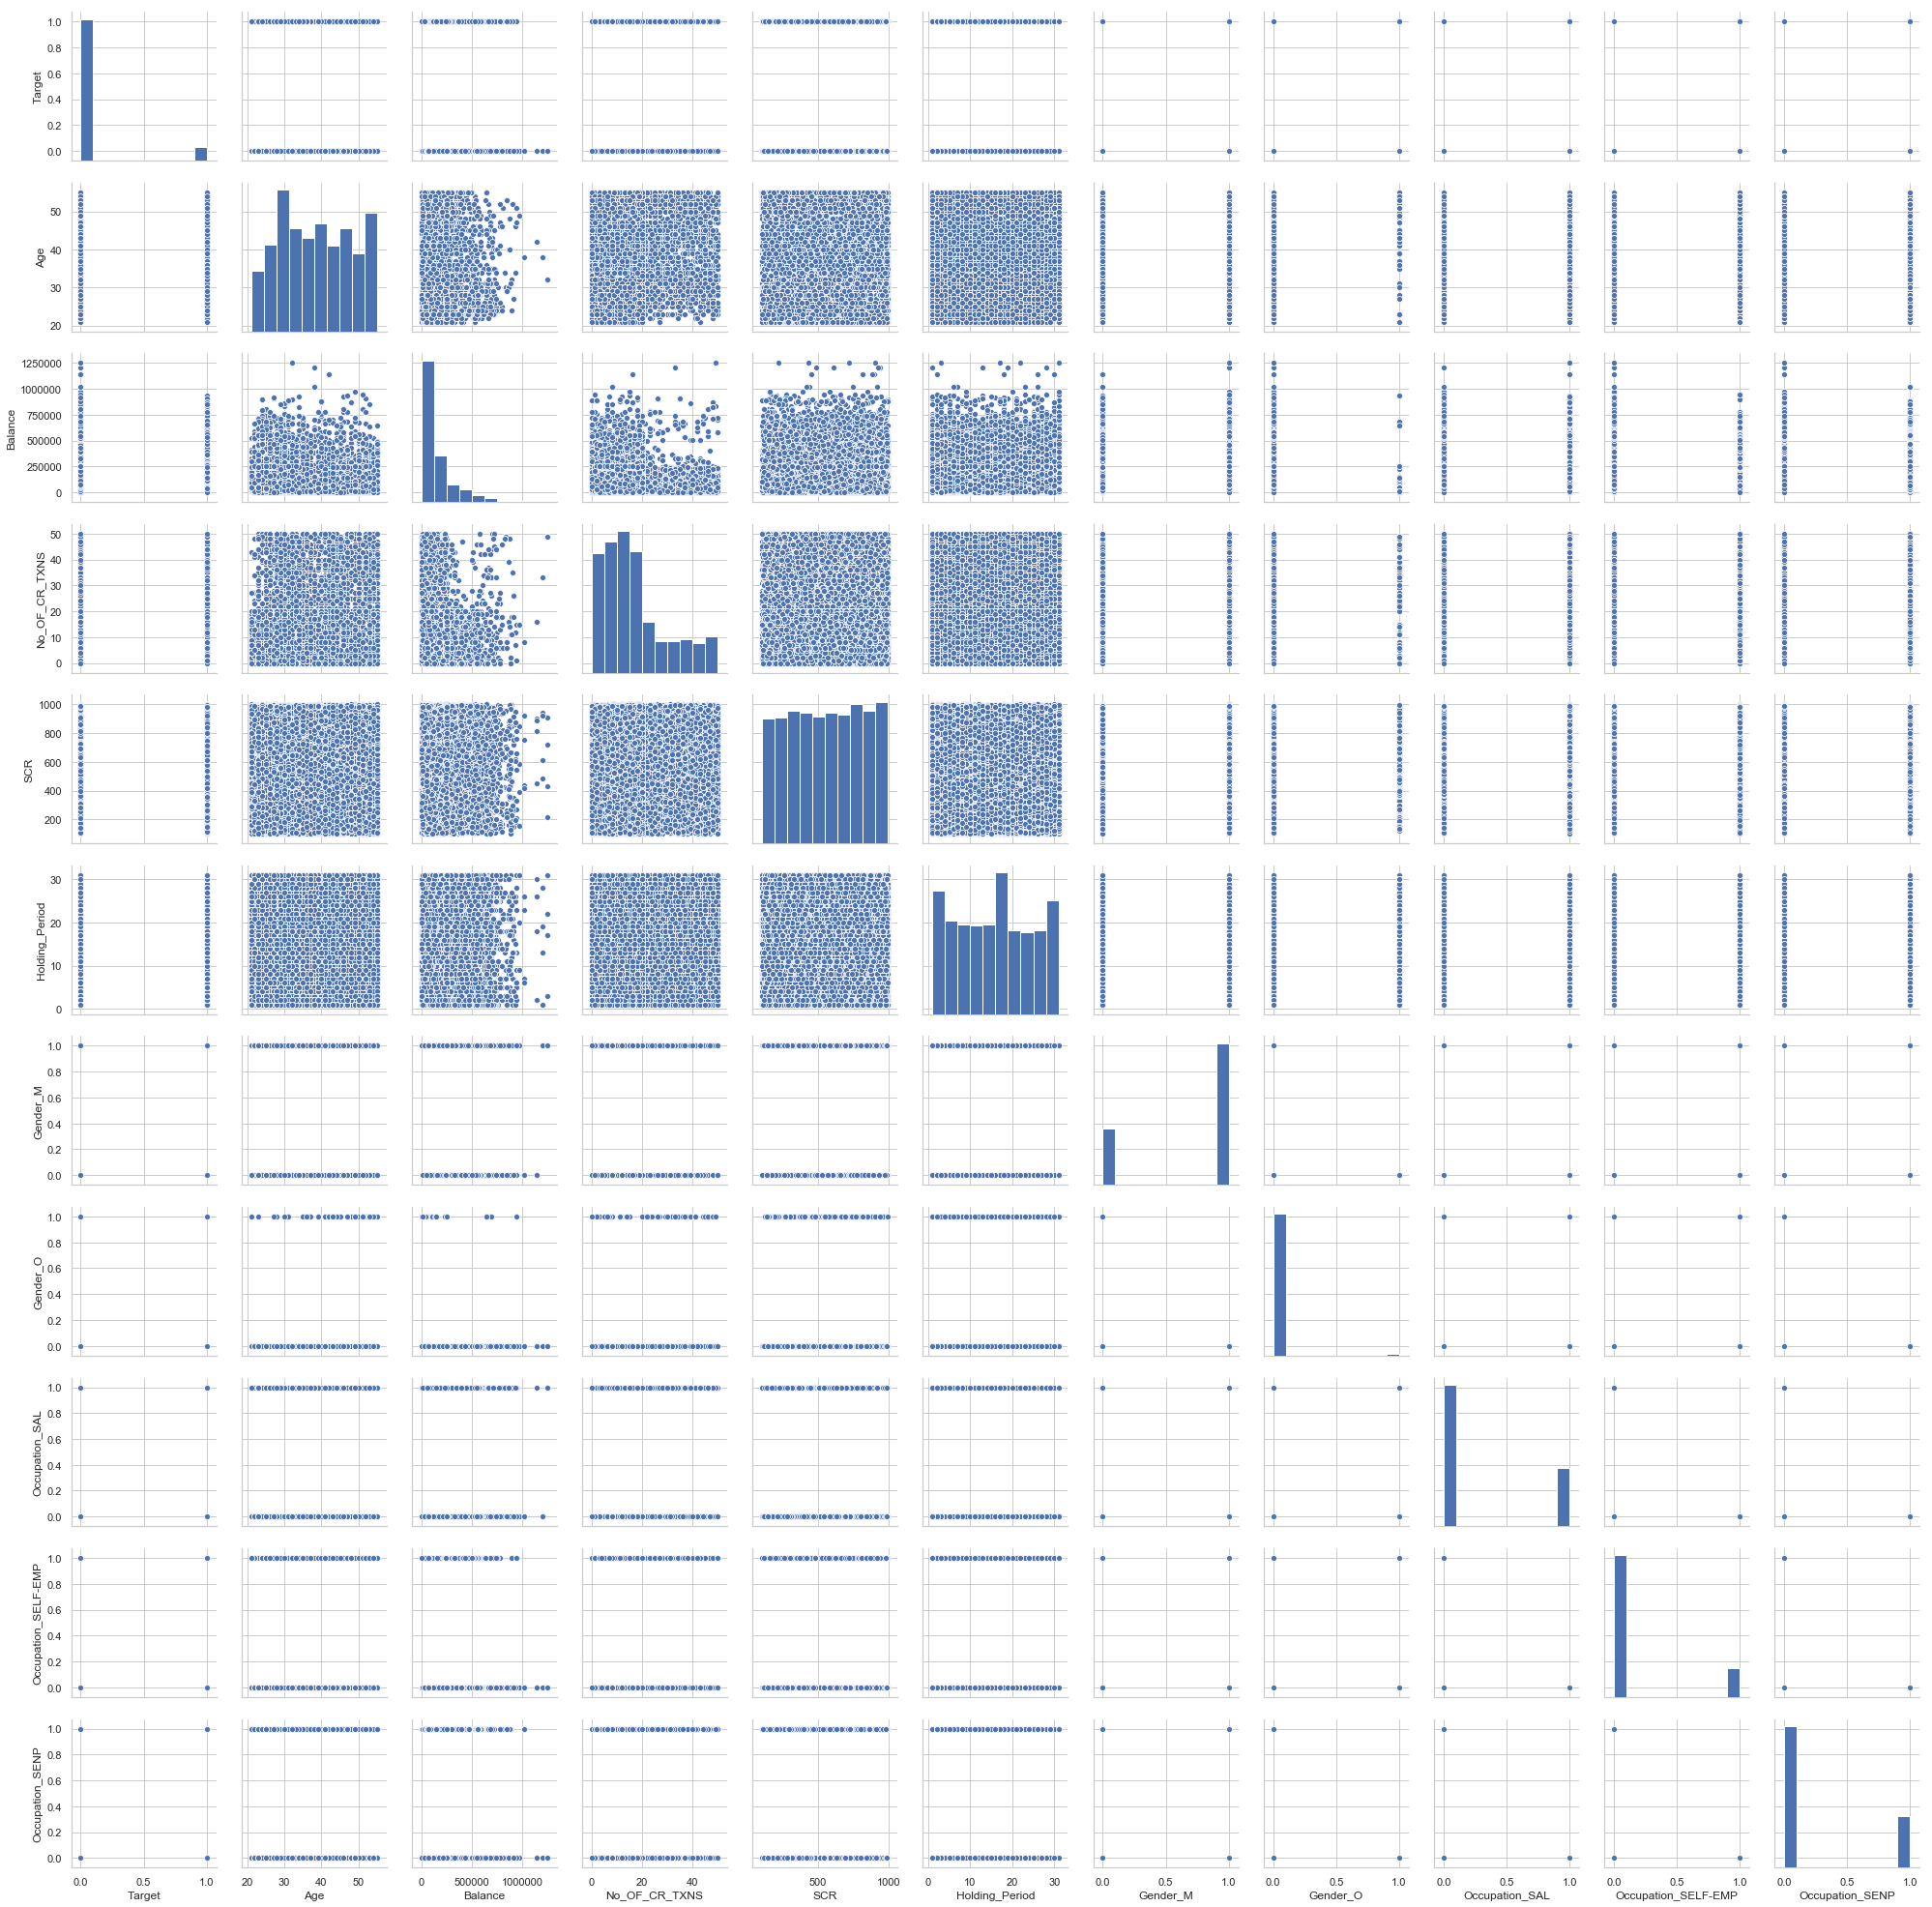

In [37]:
sns.pairplot(data_df)
plt.show()

##### Note: Since this is a practice assessment, please do go ahead and practice various types of Exploratory Data Analysis. Please do practice various kinds of univariate analysis as well. Try to develop your own business solutions for this dataset.

# Check the distribution of values in the 'Target' column and check the percentage of Ones and Zeroes.

In [46]:
data_df['Target'].value_counts()

0    18267
1     1733
Name: Target, dtype: int64

Now that we know the distribution of Ones and Zeroes, let us go ahead and check the percentage of Ones and Zeroes.

In [59]:
print ('The percentage of zeroes in the Target variable is',(data_df['Target'].value_counts()[0]/len(data_df['Target']))*100,
       '\n',
      'and the percentage of ones in the Target variable is',(data_df['Target'].value_counts()[1]/len(data_df['Target']))*100)


The percentage of zeroes in the Target variable is 91.335 
 and the percentage of ones in the Target variable is 8.665000000000001


# Split the data into training and test set to build and evaluate the model respectively.

In [66]:
# capture the target column ("default") into separate vectors for training set and test set

X = data_df.drop("Target" , axis=1)

y = data_df.pop("Target")




In [69]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=.30, random_state=1)

In [72]:
X_train.head()

,Age,Balance,No_OF_CR_TXNS,SCR,Holding_Period,Gender_M,Gender_O,Occupation_SAL,Occupation_SELF-EMP,Occupation_SENP
11408,33,196959.81,13,339,17,1,0,1,0,0
3616,37,520617.92,14,823,16,1,0,0,0,0
9747,29,39202.24,0,726,1,0,0,0,0,1
6915,26,59626.92,3,872,1,1,0,1,0,0
4888,28,127680.47,11,389,4,0,0,0,0,1


In [73]:
Y_train.head()

11408    0
3616     0
9747     0
6915     0
4888     0
Name: Target, dtype: int64

In [74]:
X_test.head()

,Age,Balance,No_OF_CR_TXNS,SCR,Holding_Period,Gender_M,Gender_O,Occupation_SAL,Occupation_SELF-EMP,Occupation_SENP
11456,49,12648.67,4,504,6,1,0,0,0,0
16528,46,225555.00,11,148,30,1,0,1,0,0
3253,53,139016.51,4,228,19,1,0,0,0,0
18614,33,289983.31,14,197,9,0,0,0,1,0
1544,37,293815.00,34,476,17,1,0,1,0,0


In [75]:

Y_test.head()

11456    0
16528    0
3253     0
18614    0
1544     0
Name: Target, dtype: int64

Now since the data has been split in the 70:30 (train:test) ratio, let us check the distribution of Ones and Zeroes in the Y ('Target') variable.

In [77]:
Y_train.value_counts(normalize=True)

0    0.913
1    0.087
Name: Target, dtype: float64

In [78]:
Y_test.value_counts(normalize=True)

0    0.914167
1    0.085833
Name: Target, dtype: float64

From the above two code snippets, we can see that the proportion of Ones and Zeroes in the training and test set is the same as the proportion of Ones and Zeroes that were present in the whole dataset.

##### Note: Since this is a practice exercise and we are trying to understand the various nuances of various functions and algorithms we have checked the proportions of Ones and Zeroes in the target variable in both the train and test data. Ideally, we should only be working with the training data. We should not see and analyse the test data. 

# Build the LDA algorithm without scaling the predictor variables and use this model to predict on the test set and compute the confusion matrix. 
### For further reference in this codebook, we will refer to this model as Model1.

In [87]:
clf = LinearDiscriminantAnalysis()

In [88]:
model1=clf.fit(X_train,Y_train)
model1

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [89]:
# Predict it
pred_class = model1.predict(X_test)

In [90]:
print(classification_report(Y_test, pred_class))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96      5485
           1       0.54      0.04      0.07       515

    accuracy                           0.91      6000
   macro avg       0.73      0.52      0.51      6000
weighted avg       0.88      0.91      0.88      6000



# Build the LDA algorithm with scaling the predictor variables and use this model to predict on the test set and compute the confusion matrix. 
### For further reference in this codebook, we will refer to this model as Model2.

In [94]:
X_scaledtrain=scale(X_train)

In [95]:
model2=clf.fit(X_scaledtrain,Y_train)
model2

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [96]:
# Predict it
pred_class2 = model2.predict(X_test)

In [97]:
print(classification_report(Y_test, pred_class2))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95      5485
           1       0.09      0.01      0.02       515

    accuracy                           0.90      6000
   macro avg       0.50      0.50      0.49      6000
weighted avg       0.84      0.90      0.87      6000



We can see that there is a change in the various model evaluation metrics calculated from the confusion matrix.

### Please do try to calculate other model performance measures. Do play around with the data and check whether the accuracy can be increased or not.